# PC Test Environ Maker

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tangle import Tangle, node_graph, watcher, analyser
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

## Experiment 1

This is a test experiment, I didn't need to actually make a conflicting transaction here as we aren't monitoring the orphan status of the original transaction. We are instead measuring the number of tip confirmations.

This experiment will test the number of tip confirmations of a system built with a parasite chain and a system with the same number of transactions without the parastie chain.

### PC Tangle CLength = 10 rate = 5

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=5, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(10)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()



First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630ABE22A0>]
Edges []
Node IDS [0]
Weights [[0, 1280, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630ABE22A0>, <tangle.node object at 0x00000263090BE900>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1280, 1], [1, 1891, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630ABE22A0>, <tangle.node object at 0x00000263090BE900>, <tangle.node object at 0x00000263090BC9E0>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 1280, 1], [1, 1891, 1], [2, 210, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630ABE22A0>, <tangle.node object at 0x00000263090BE900>, <tangle.node object at 0x00000263090BC9E0>, <tangle.node object at 0x0000026308D83AA0>]
Edges [(1, 0), (2, 1), (2, 0), (3, 2), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1280, 1], [1, 1891, 1], [2, 210, 1], [3, 1380, 1]]
Finishe

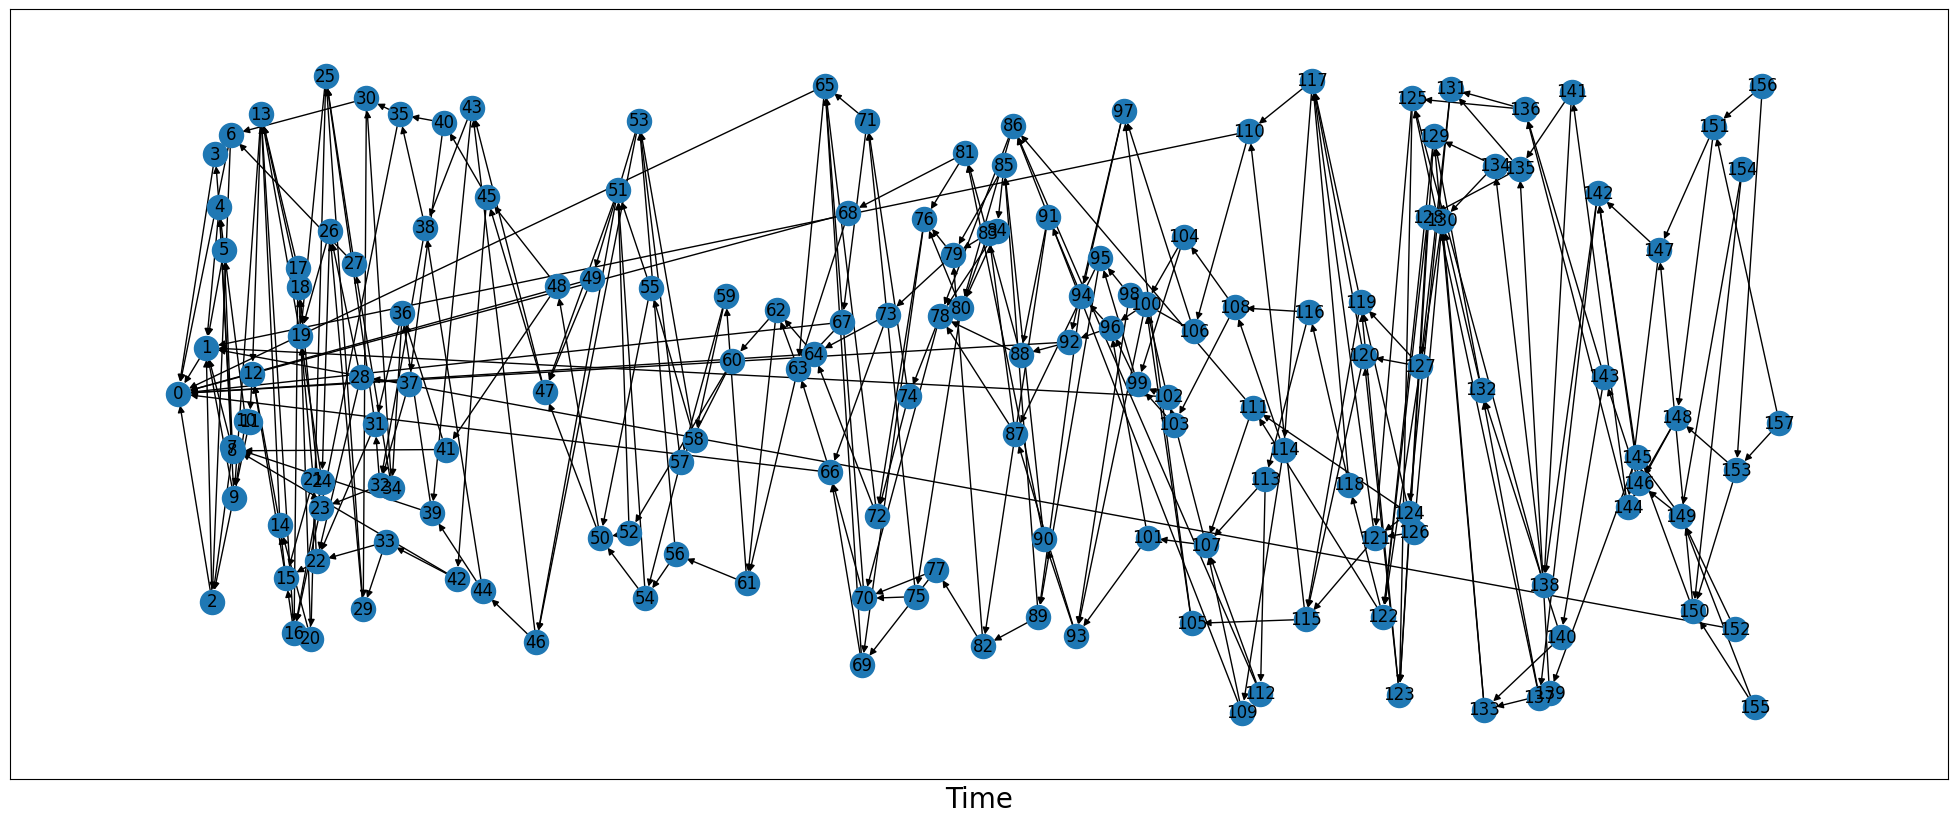

In [3]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 4, 4, 5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 14, 16, 16, 16, 16, 16, 16, 17, 17, 17, 19, 20, 22, 24, 26, 26, 26, 26, 28, 28, 28, 31, 31, 32, 35, 38, 40, 40, 41, 41, 42, 43, 46, 46, 47, 48, 49, 51, 52, 55, 58, 59, 60, 61, 62, 62, 62, 63, 63, 64, 64, 66, 66, 66, 66, 67, 68, 69, 69, 71, 71, 73, 73, 75, 77, 77, 77, 77, 79, 80, 82, 82, 84, 84, 86, 89, 91, 91, 91, 92, 96, 96, 96, 96, 96, 96, 96, 96, 99, 100, 100, 101, 103, 103, 104, 105, 106, 106, 108, 110, 110, 112, 112, 113, 115, 117, 118, 121, 121, 122, 124, 124, 124, 126, 126, 128, 128, 129, 130, 132, 133, 134, 134, 134, 137, 139, 140, 140, 143, 144] [1.0, 1.057549137101811, 1.27985604348756, 1.3960841783761024, 1.5506564747511942, 1.7334510864120443, 1.9847082924764587, 2.029089217649548, 2.0525830707427133, 2.1070000553598374, 2.5476270780363435, 2.6948080016941076, 2.799110972262137, 3.1297241019514437, 3.841691278131991, 4.065197158165368, 4.37299745384383, 4.519539977617874, 4.5695971458959805

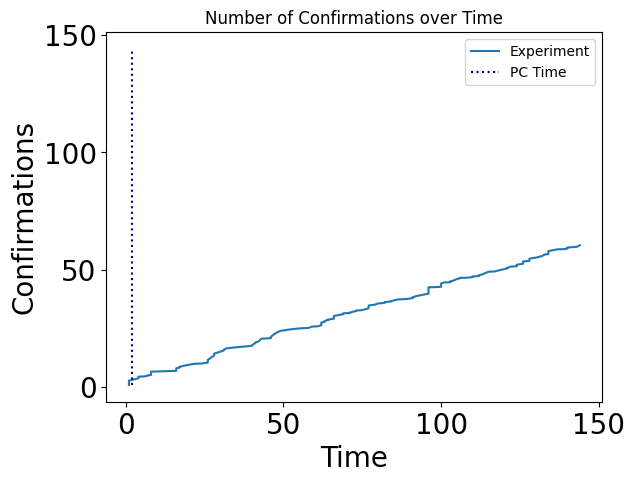

In [4]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [5]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 333], [2, 1.0019646365422397, 509], [3, 1.185823754789272, 522], [4, 2.3172268907563027, 476], [5, 5.5127478753541075, 353], [6, 10.10344827586207, 261], [7, 13.916981132075472, 265], [8, 16.525490196078433, 255], [9, 18.641129032258064, 248], [10, 20.98744769874477, 239], [11, 23.072, 250], [12, 24.92452830188679, 265], [13, 27.608870967741936, 248], [14, 30.0727969348659, 261], [15, 32.55364806866953, 233], [16, 34.8, 270], [17, 37.454887218045116, 266], [18, 40.246153846153845, 260], [19, 42.077551020408166, 245], [20, 44.857142857142854, 259], [21, 46.78823529411765, 255], [22, 49.45381526104418, 249], [23, 52.37179487179487, 234], [24, 54.091633466135455, 251], [25, 56.717557251908396, 262], [26, 58.98684210526316, 228], [27, 62.00416666666667, 240], [28, 63.97769516728624, 269], [29, 66.05660377358491, 265], [30, 68.77366255144032, 243], [31, 71.47177419354838, 248], [32, 73.7420634920635, 252], [33, 76.18181818181819, 242], [34, 78.98501872659176, 267], [35, 81.6410256

[[1, 1.0, 333], [2, 1.0019646365422397, 509], [3, 1.185823754789272, 522], [4, 2.3172268907563027, 476], [5, 5.5127478753541075, 353], [6, 10.10344827586207, 261], [7, 13.916981132075472, 265], [8, 16.525490196078433, 255], [9, 18.641129032258064, 248], [10, 20.98744769874477, 239], [11, 23.072, 250], [12, 24.92452830188679, 265], [13, 27.608870967741936, 248], [14, 30.0727969348659, 261], [15, 32.55364806866953, 233], [16, 34.8, 270], [17, 37.454887218045116, 266], [18, 40.246153846153845, 260], [19, 42.077551020408166, 245], [20, 44.857142857142854, 259], [21, 46.78823529411765, 255], [22, 49.45381526104418, 249], [23, 52.37179487179487, 234], [24, 54.091633466135455, 251], [25, 56.717557251908396, 262], [26, 58.98684210526316, 228], [27, 62.00416666666667, 240], [28, 63.97769516728624, 269], [29, 66.05660377358491, 265], [30, 68.77366255144032, 243], [31, 71.47177419354838, 248], [32, 73.7420634920635, 252], [33, 76.18181818181819, 242], [34, 78.98501872659176, 267], [35, 81.6410256

Text(0, 0.5, 'Confirmations')

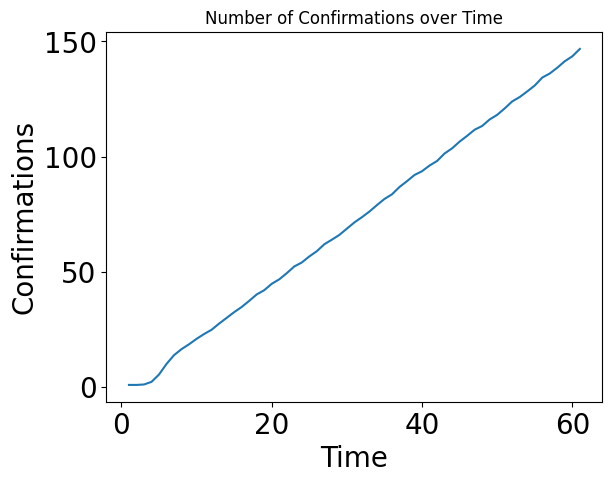

In [6]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [7]:
df.to_csv("pc-r5-c10 100")

100 tests were run and preliminary results show a difference in the early PC attachment approval rate at chain length 10.

### PC Tangle CLength = 20

In [8]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=5, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(20)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630B772CC0>]
Edges []
Node IDS [0]
Weights [[0, 1887, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630B772CC0>, <tangle.node object at 0x000002630AEAA0C0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1887, 1], [1, 1142, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630B772CC0>, <tangle.node object at 0x000002630AEAA0C0>, <tangle.node object at 0x000002630AEA88F0>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1887, 1], [1, 1142, 1], [2, 1683, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630B772CC0>, <tangle.node object at 0x000002630AEAA0C0>, <tangle.node object at 0x000002630AEA88F0>, <tangle.node object at 0x000002630AF1A9C0>]
Edges [(1, 0), (2, 0), (2, 1), (3, 2), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1887, 1], [1, 1142, 1], [2, 1683, 1], [3, 1182, 1]]
Finis

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 4, 4, 4, 5, 7, 14, 15, 15, 17, 17, 19, 19, 20, 21, 22, 22, 27, 28, 28, 29, 29, 29, 30, 31, 32, 32, 33, 34, 35, 35, 36, 36, 38, 38, 38, 40, 43, 44, 45, 45, 45, 45, 45, 45, 45, 46, 46, 50, 54, 55, 55, 55, 55, 55, 56, 56, 57, 57, 57, 60, 60, 64, 64, 64, 65, 65, 65, 65, 66, 70, 71, 71, 71, 71, 71, 73, 74, 74, 77, 78, 80, 82, 82, 84, 84, 86, 88, 89, 90, 92, 93, 94, 95, 96, 98, 100, 101, 102, 102, 102, 103, 104, 106, 106, 107, 107, 110, 112, 112, 112, 113, 114, 115, 117, 118, 119, 119, 121, 121, 122, 123, 123, 125, 128, 130, 130, 131, 131, 131, 132, 134, 135, 137, 137, 137, 137, 137, 137, 138, 139, 142, 143, 146, 146, 148, 148, 148, 148, 149, 152, 152, 152, 152, 152, 153, 155, 157, 158, 160] [1.0, 1.0090150081321934, 1.1468109174228425, 1.261738522819284, 1.3529763801685208, 1.5420805665650517, 1.67781656316946, 1.8470005344255538, 2.3593890688089525, 2.921355357429328, 3.128449331746719, 3.2074082330988793, 3.3230908565202473, 3.3243433599

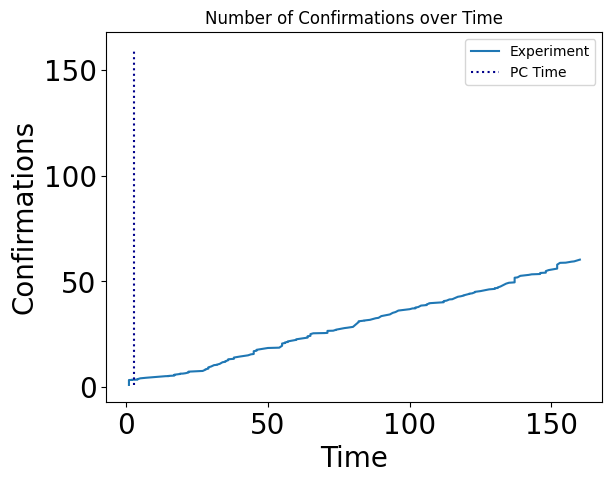

In [9]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [10]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 346], [2, 1.0021276595744681, 470], [3, 1.1767151767151767, 481], [4, 2.4202020202020202, 495], [5, 6.032608695652174, 460], [6, 10.960869565217392, 460], [7, 16.20689655172414, 348], [8, 20.626582278481013, 316], [9, 25.11969111969112, 259], [10, 27.544444444444444, 270], [11, 29.392857142857142, 252], [12, 31.480176211453745, 227], [13, 33.27467811158798, 233], [14, 35.39325842696629, 267], [15, 37.44308943089431, 246], [16, 39.62162162162162, 259], [17, 42.191570881226056, 261], [18, 44.52674897119341, 243], [19, 46.63035019455253, 257], [20, 49.19433198380567, 247], [21, 51.2007874015748, 254], [22, 53.738589211618255, 241], [23, 56.32170542635659, 258], [24, 58.76229508196721, 244], [25, 61.16475095785441, 261], [26, 63.215384615384615, 260], [27, 65.89558232931726, 249], [28, 68.4904214559387, 261], [29, 70.45703125, 256], [30, 73.03088803088804, 259], [31, 75.98148148148148, 270], [32, 78.09505703422053, 263], [33, 81.04633204633204, 259], [34, 83.38866396761134, 247],

[[1, 1.0, 346], [2, 1.0021276595744681, 470], [3, 1.1767151767151767, 481], [4, 2.4202020202020202, 495], [5, 6.032608695652174, 460], [6, 10.960869565217392, 460], [7, 16.20689655172414, 348], [8, 20.626582278481013, 316], [9, 25.11969111969112, 259], [10, 27.544444444444444, 270], [11, 29.392857142857142, 252], [12, 31.480176211453745, 227], [13, 33.27467811158798, 233], [14, 35.39325842696629, 267], [15, 37.44308943089431, 246], [16, 39.62162162162162, 259], [17, 42.191570881226056, 261], [18, 44.52674897119341, 243], [19, 46.63035019455253, 257], [20, 49.19433198380567, 247], [21, 51.2007874015748, 254], [22, 53.738589211618255, 241], [23, 56.32170542635659, 258], [24, 58.76229508196721, 244], [25, 61.16475095785441, 261], [26, 63.215384615384615, 260], [27, 65.89558232931726, 249], [28, 68.4904214559387, 261], [29, 70.45703125, 256], [30, 73.03088803088804, 259], [31, 75.98148148148148, 270], [32, 78.09505703422053, 263], [33, 81.04633204633204, 259], [34, 83.38866396761134, 247],

Text(0, 0.5, 'Confirmations')

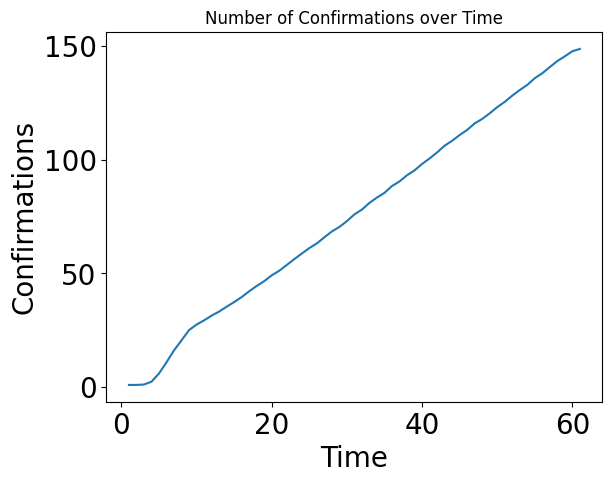

In [11]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [12]:
df.to_csv("pc-r5-c20 100")

## Clength = 5

In [13]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=5, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(5)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630AE7DD00>]
Edges []
Node IDS [0]
Weights [[0, 1702, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630AE7DD00>, <tangle.node object at 0x0000026308D62660>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1702, 1], [1, 1051, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630AE7DD00>, <tangle.node object at 0x0000026308D62660>, <tangle.node object at 0x000002630AE7EED0>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1702, 1], [1, 1051, 1], [2, 1700, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630AE7DD00>, <tangle.node object at 0x0000026308D62660>, <tangle.node object at 0x000002630AE7EED0>, <tangle.node object at 0x000002630AC670B0>]
Edges [(1, 0), (2, 0), (2, 1), (3, 1), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1702, 1], [1, 1051, 1], [2, 1700, 1], [3, 1141, 1]]
Finis

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 5, 5, 7, 7, 8, 9, 9, 10, 13, 17, 17, 17, 17, 19, 19, 20, 20, 24, 24, 24, 25, 26, 28, 29, 29, 29, 32, 33, 34, 35, 36, 38, 38, 38, 41, 42, 42, 45, 46, 46, 46, 48, 48, 50, 50, 50, 52, 55, 55, 55, 55, 57, 58, 59, 59, 62, 63, 64, 65, 66, 68, 70, 71, 71, 72, 73, 74, 75, 76, 76, 76, 78, 78, 78, 80, 83, 84, 85, 86, 86, 86, 86, 89, 92, 94, 94, 94, 94, 94, 95, 96, 97, 97, 100, 102, 103, 103, 103, 105, 107, 107, 110, 110, 111, 111, 112, 113, 115, 116, 117, 120, 120, 120, 121, 121, 124, 125, 125, 126, 126, 127, 127, 127, 128, 128, 128, 131, 132, 133, 134, 137, 137] [1.0, 1.437532216025825, 1.6431146481142496, 1.6450206249279016, 1.6774484781664678, 1.9164223235380538, 2.067522786034612, 2.144191164055673, 2.2185936355672977, 2.3289605999467065, 2.4555046564567515, 2.4824764857992383, 2.7487439308791513, 2.7681502224730323, 2.7767930750701897, 3.465813101518869, 4.125892665064525, 4.392411952821774, 4.5052627136911685, 4.66283350060768

2.3289605999467065
[[1, 1.0, 351], [2, 1.0, 486], [3, 1.1275167785234899, 447], [4, 2.0786163522012577, 318], [5, 4.26978417266187, 278], [6, 7.130081300813008, 246], [7, 9.965367965367966, 231], [8, 12.209016393442623, 244], [9, 14.542168674698795, 249], [10, 16.87727272727273, 220], [11, 19.109375, 256], [12, 21.733333333333334, 240], [13, 24.020833333333332, 240], [14, 26.333333333333332, 249], [15, 28.426160337552744, 237], [16, 31.092741935483872, 248], [17, 33.053941908713696, 241], [18, 35.742489270386265, 233], [19, 37.8531746031746, 252], [20, 40.466911764705884, 272], [21, 43.276, 250], [22, 45.81368821292776, 263], [23, 48.29811320754717, 265], [24, 50.535714285714285, 252], [25, 53.0199203187251, 251], [26, 55.86666666666667, 240], [27, 58.03409090909091, 264], [28, 60.48708487084871, 271], [29, 63.07929515418502, 227], [30, 65.6344537815126, 238], [31, 67.5891472868217, 258], [32, 69.53125, 224], [33, 72.0546875, 256], [34, 74.44964028776978, 278], [35, 77.4980694980695, 2

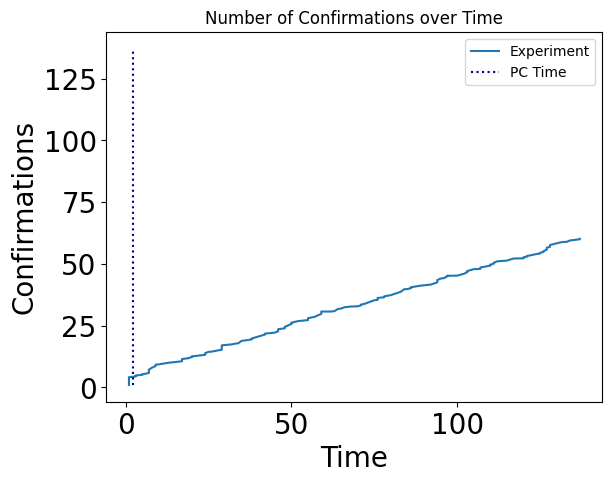

In [14]:
w.plot_confirm_over_time()
print(w.PC_add_time)
a = analyser()
results = a.get_res(100)

[[1, 1.0, 351], [2, 1.0, 486], [3, 1.1275167785234899, 447], [4, 2.0786163522012577, 318], [5, 4.26978417266187, 278], [6, 7.130081300813008, 246], [7, 9.965367965367966, 231], [8, 12.209016393442623, 244], [9, 14.542168674698795, 249], [10, 16.87727272727273, 220], [11, 19.109375, 256], [12, 21.733333333333334, 240], [13, 24.020833333333332, 240], [14, 26.333333333333332, 249], [15, 28.426160337552744, 237], [16, 31.092741935483872, 248], [17, 33.053941908713696, 241], [18, 35.742489270386265, 233], [19, 37.8531746031746, 252], [20, 40.466911764705884, 272], [21, 43.276, 250], [22, 45.81368821292776, 263], [23, 48.29811320754717, 265], [24, 50.535714285714285, 252], [25, 53.0199203187251, 251], [26, 55.86666666666667, 240], [27, 58.03409090909091, 264], [28, 60.48708487084871, 271], [29, 63.07929515418502, 227], [30, 65.6344537815126, 238], [31, 67.5891472868217, 258], [32, 69.53125, 224], [33, 72.0546875, 256], [34, 74.44964028776978, 278], [35, 77.4980694980695, 259], [36, 80.371647

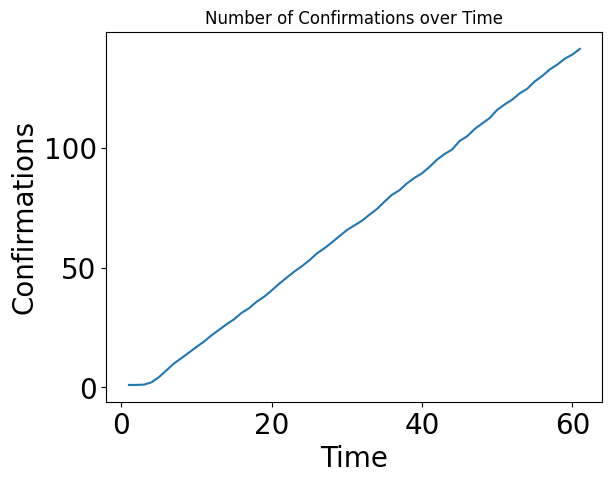

In [15]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

df.to_csv("pc-r5-c5 100")